In [1]:
#Revised September 2019 - remove plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
#from mpl_toolkits.basemap import Basemap
import datetime
from scipy import signal

import matplotlib.dates as mdates

In [2]:
%matplotlib inline
plt.ion()

In [53]:
#full list
log_files=[
['/home/pkotze/python/SKA-MPI Power measurements/power_test_A1_1/CSV/97intvl.csv','Initial A power check',[
    ['A1.1',pd.Timestamp('09:12:40')],
    ['Mains CB',pd.Timestamp('09:12:55')],
    ['A1.2',pd.Timestamp('09:13:49')],
    ['Controller',pd.Timestamp('09:13:55')],
    ['A1.3',pd.Timestamp('09:15:35')],
    ['A1.4 DC fan',pd.Timestamp('09:16:05')],
    ['A1.4 PSC?',pd.Timestamp('09:16:43')],
    ['A1.5',pd.Timestamp('09:17:28')],
    ['V.M Consumption',pd.Timestamp('09:18:33')]]],
['/home/pkotze/python/SKA-MPI Power measurements/power_test_A1_2/CSV/97intvl.csv','Repeat A power check',[
    ['A1.1',pd.Timestamp('10:12:54')],
    ['A1.2',pd.Timestamp('10:12:55')],
    ['A1.3',pd.Timestamp('10:13:35')],
    ['A1.4',pd.Timestamp('10:14:10')],
    ['A1.5',pd.Timestamp('10:15:38')],
    ['A1.6',pd.Timestamp('10:16:20')],
    ['A1.7',pd.Timestamp('10:16:35')],
    ['A1.8',pd.Timestamp('10:16:55')],
    ['A1.9',pd.Timestamp('10:17:20')]]],
['/home/pkotze/python/SKA-MPI Power measurements/power_test_C 20elev/CSV/97intvl.csv','C power check 20 elevation'],
['/home/pkotze/python/SKA-MPI Power measurements/power_test_C 85elev/CSV/97intvl.csv','C power check 85 elevation'],
['/home/pkotze/python/SKA-MPI Power measurements/power_test_D/CSV/97intvl.csv','D  power check']]



In [4]:
for log_file,description in log_files:   #print(log_file)
    df=pd.read_csv(log_file,header=1,parse_dates=['Time'])
    #sub_range=list(range(3,df.shape[0])) #getting number of entries?  could go less
        #print(type(df))
    #overview(df,log_file + ' * ' + description)
    #OAT(df,log_file + ' * ' + description)
    #fuel(df,log_file + ' * ' + description)
    #airspeed(df,log_file + ' * ' + description)
    
    

In [5]:
#Power factor and U

def v_plotter(log_file):
    print(log_file)
    df=pd.read_csv(log_file,header=1,parse_dates=['Time'], na_values=' ----- ')
    maxurms1=np.asarray( df['MaxUrms1'] ).astype(float)
    maxurms2=np.asarray( df['MaxUrms2'] ).astype(float)
    maxurms3=np.asarray( df['MaxUrms3'] ).astype(float)
    
    minurms1=np.asarray( df['MinUrms1'] ).astype(float)
    minurms2=np.asarray( df['MinUrms2'] ).astype(float)
    minurms3=np.asarray( df['MinUrms3'] ).astype(float)
    
    aveurms1=np.asarray( df['AveUrms1'] ).astype(float)
    aveurms2=np.asarray( df['AveUrms2'] ).astype(float)
    aveurms3=np.asarray( df['AveUrms3'] ).astype(float)
    
    timestamps=(df['Time'])
    
    fig,[ax1,ax2,ax3] = plt.subplots(nrows=3, ncols=1, figsize=(20,15))
      
    ax1.set(title=log_file + " => " + "Voltage", ylabel='Voltage Max [V rms] ', xlabel='Time [H:M:S]') 
    ax1.plot(timestamps, maxurms1, 'r')
    ax1.plot(timestamps, maxurms2, 'y')
    ax1.plot(timestamps, maxurms3, 'b')
    ax1.xaxis.set_major_locator(mdates.SecondLocator(interval=second_interval))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) 
    ax1.tick_params(axis='x', labelrotation=rotate)
    ax1.legend(['Phase 1','Phase 2','Phase 3'])
    ax1.grid()
    
    #ax2.set(title=log_file + " => " , ylabel='Voltage Min [I]', xlabel='Time [H:M:S]') 
    ax2.set( ylabel='Voltage Min [V rms]', xlabel='Time [H:M:S]') 
    ax2.plot(timestamps, minurms1, 'r')
    ax2.plot(timestamps, minurms2, 'y')
    ax2.plot(timestamps, minurms3, 'b')
    ax2.xaxis.set_major_locator(mdates.SecondLocator(interval=second_interval))
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) 
    ax2.tick_params(axis='x', labelrotation=rotate)
    ax2.legend(['Phase 1','Phase 2','Phase 3'])
    ax2.grid()
    
    #ax3.set(title=log_file + " => " , ylabel='Voltage Ave [I]', xlabel='Time [H:M:S]') 
    ax3.set(ylabel='Voltage Ave [V rms]', xlabel='Time [H:M:S]') 
    ax3.plot(timestamps, aveurms1, 'r')
    ax3.plot(timestamps, aveurms2, 'y')
    ax3.plot(timestamps, aveurms3, 'b')
    ax3.xaxis.set_major_locator(mdates.SecondLocator(interval=second_interval))
    ax3.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) 
    ax3.tick_params(axis='x', labelrotation=rotate)
    ax3.legend(['Phase 1','Phase 2','Phase 3'])
    ax3.grid()


In [256]:
#Power factor and U

def v_plotter1(log_file, annotate=False):
    print(log_file)
    df=pd.read_csv(log_file,header=1,parse_dates=['Time'], na_values=' ----- ')
    maxurms1=np.asarray( df['MaxUrms1'] ).astype(float)
    maxurms2=np.asarray( df['MaxUrms2'] ).astype(float)
    maxurms3=np.asarray( df['MaxUrms3'] ).astype(float)
    
    minurms1=np.asarray( df['MinUrms1'] ).astype(float)
    minurms2=np.asarray( df['MinUrms2'] ).astype(float)
    minurms3=np.asarray( df['MinUrms3'] ).astype(float)
    
    aveurms1=np.asarray( df['AveUrms1'] ).astype(float)
    aveurms2=np.asarray( df['AveUrms2'] ).astype(float)
    aveurms3=np.asarray( df['AveUrms3'] ).astype(float)
    
    timestamps=(df['Time'])
    
    fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(20,14))
      
    ax.set(title=log_file + " => " + "Voltage", ylabel='Voltage [V rms] ', xlabel='Time [H:M:S]') 
    ax.plot(timestamps, maxurms1, 'r--')
    ax.plot(timestamps, maxurms2, 'y--')
    ax.plot(timestamps, maxurms3, 'b--')
    ax.plot(timestamps, minurms1, 'r:')
    ax.plot(timestamps, minurms2, 'y:')
    ax.plot(timestamps, minurms3, 'b:')
    ax.plot(timestamps, aveurms1, 'r')
    ax.plot(timestamps, aveurms2, 'y')
    ax.plot(timestamps, aveurms3, 'b')
    ax.xaxis.set_major_locator(mdates.SecondLocator(interval=second_interval))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) 
    ax.tick_params(axis='x', labelrotation=rotate)
    ax.legend(['Phase 1 Max','Phase 2 Max','Phase 3 Max',
               'Phase 1 Min','Phase 2 Min','Phase 3 Min',
               'Phase 1 Avg','Phase 2 Avg','Phase 3 Avg'])
    ax.grid()
    if annotate == True:
        df.set_index('Time',inplace=True) 
        y_index=[df.index.get_loc(pd.to_datetime(date), method='nearest') for date in dates]
        y_values=maxurms1[y_index]
        for ii, (iname, idate, yvalue) in enumerate(zip(names, dates, y_values)):
            ax.annotate(iname, (mdates.date2num(idate), yvalue), xytext=(15, 15), 
                    textcoords='offset points', arrowprops=dict(arrowstyle='-|>')) 
    fig.savefig(log_file+'_voltage1.png')

In [7]:
def i_plotter(log_file):
    print(log_file)
    df=pd.read_csv(log_file,header=1,parse_dates=['Time'], na_values=' ----- ')
    maxirms1=np.asarray( df['MaxIrms1'] ).astype(float)
    maxirms2=np.asarray( df['MaxIrms2'] ).astype(float)
    maxirms3=np.asarray( df['MaxIrms3'] ).astype(float)
    maxirms4=np.asarray( df['MaxIrms4'] ).astype(float)
    
    minirms1=np.asarray( df['MinIrms1'] ).astype(float)
    minirms2=np.asarray( df['MinIrms2'] ).astype(float)
    minirms3=np.asarray( df['MinIrms3'] ).astype(float)
    minirms4=np.asarray( df['MinIrms4'] ).astype(float)
    
    aveirms1=np.asarray( df['AveIrms1'] ).astype(float)
    aveirms2=np.asarray( df['AveIrms2'] ).astype(float)
    aveirms3=np.asarray( df['AveIrms3'] ).astype(float)
    aveirms4=np.asarray( df['AveIrms4'] ).astype(float)
    
    timestamps=(df['Time'])
    
    fig,[ax1,ax2,ax3] = plt.subplots(nrows=3, ncols=1, figsize=(20,15))
    
    ax1.set(title=log_file + " => "  + "Current", ylabel='Current Max [I rms] ', xlabel='Time [H:M:S]') 
    ax1.plot(timestamps, maxirms1, 'r')
    ax1.plot(timestamps, maxirms2, 'b')
    ax1.plot(timestamps, maxirms3, 'y')
    ax1.plot(timestamps, maxirms4, 'k')
    ax1.xaxis.set_major_locator(mdates.SecondLocator(interval=second_interval))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) 
    ax1.tick_params(axis='x', labelrotation=rotate)
    ax1.legend(['Phase 1','Phase 2','Phase 3','Phase 4'])
    ax1.grid()
    
    #ax2.set(title=log_file + " => " , ylabel='Current Min [I]', xlabel='Time [H:M:S]') 
    ax2.set(ylabel='Current Min [I rms]', xlabel='Time [H:M:S]') 
    ax2.plot(timestamps, minirms1, 'r')
    ax2.plot(timestamps, minirms2, 'b')
    ax2.plot(timestamps, minirms3, 'y')
    ax2.plot(timestamps, minirms4, 'k')
    ax2.xaxis.set_major_locator(mdates.SecondLocator(interval=second_interval))
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) 
    ax2.tick_params(axis='x', labelrotation=rotate)
    ax2.legend(['Phase 1','Phase 2','Phase 3','Phase 4'])
    ax2.grid()
    
    #ax3.set(title=log_file + " => " , ylabel='Current Ave [I]', xlabel='Time [H:M:S]') 
    ax3.set(ylabel='Current Ave [I rms]', xlabel='Time [H:M:S]') 
    ax3.plot(timestamps, aveirms1, 'r')
    ax3.plot(timestamps, aveirms2, 'b')
    ax3.plot(timestamps, aveirms3, 'y')
    ax3.plot(timestamps, aveirms4, 'k')
    ax3.xaxis.set_major_locator(mdates.SecondLocator(interval=second_interval))
    ax3.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) 
    ax3.tick_params(axis='x', labelrotation=rotate)
    ax3.legend(['Phase 1','Phase 2','Phase 3','Phase 4'])
    ax3.grid()


In [258]:
def i_plotter1(log_file, annotate=False):
    print(log_file)
    df=pd.read_csv(log_file,header=1,parse_dates=['Time'], na_values=' ----- ')
    maxirms1=np.asarray( df['MaxIrms1'] ).astype(float)
    maxirms2=np.asarray( df['MaxIrms2'] ).astype(float)
    maxirms3=np.asarray( df['MaxIrms3'] ).astype(float)
    maxirms4=np.asarray( df['MaxIrms4'] ).astype(float)
    
    minirms1=np.asarray( df['MinIrms1'] ).astype(float)
    minirms2=np.asarray( df['MinIrms2'] ).astype(float)
    minirms3=np.asarray( df['MinIrms3'] ).astype(float)
    minirms4=np.asarray( df['MinIrms4'] ).astype(float)
    
    aveirms1=np.asarray( df['AveIrms1'] ).astype(float)
    aveirms2=np.asarray( df['AveIrms2'] ).astype(float)
    aveirms3=np.asarray( df['AveIrms3'] ).astype(float)
    aveirms4=np.asarray( df['AveIrms4'] ).astype(float)
    
    timestamps=(df['Time'])
    
    fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(20,14))
    
    ax.set(title=log_file + " => "  + "Current", ylabel='Current [I rms] ', xlabel='Time [H:M:S]') 
    ax.plot(timestamps, maxirms1, 'r--')
    ax.plot(timestamps, maxirms2, 'b--')
    ax.plot(timestamps, maxirms3, 'y--')
    ax.plot(timestamps, maxirms4, 'k--')
    ax.plot(timestamps, minirms1, 'r:')
    ax.plot(timestamps, minirms2, 'b:')
    ax.plot(timestamps, minirms3, 'y:')
    ax.plot(timestamps, minirms4, 'k:')
    ax.plot(timestamps, aveirms1, 'r')
    ax.plot(timestamps, aveirms2, 'b')
    ax.plot(timestamps, aveirms3, 'y')
    ax.plot(timestamps, aveirms4, 'k')
    ax.xaxis.set_major_locator(mdates.SecondLocator(interval=second_interval))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) 
    ax.tick_params(axis='x', labelrotation=rotate)
    ax.legend(['Phase 1 Max','Phase 2 Max','Phase 3 Max','Phase 4 Max',
              'Phase 1 Min','Phase 2 Min','Phase 3 Min','Phase 4 Min',
              'Phase 1 Ave','Phase 2 Ave','Phase 3 Ave','Phase 4 Ave'])
    ax.grid()
    if annotate == True:
        df.set_index('Time',inplace=True) 
        y_index=[df.index.get_loc(pd.to_datetime(date), method='nearest') for date in dates]
        y_values=maxirms4[y_index]
        for ii, (iname, idate, yvalue) in enumerate(zip(names, dates, y_values)):
            ax.annotate(iname, (mdates.date2num(idate), yvalue), xytext=(15, 15), 
                    textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
    fig.savefig(log_file+'_current1.png')    

In [9]:
def p_plotter(log_file):
    print(log_file)
    df=pd.read_csv(log_file,header=1,parse_dates=['Time'], na_values=' ----- ')
    maxp=np.asarray( df['MaxPsum'] ).astype(float)
    minp=np.asarray( df['MinPsum'] ).astype(float)
    avep=np.asarray( df['AvePsum'] ).astype(float)
    
    timestamps=(df['Time'])
    
    fig,[ax1,ax2,ax3] = plt.subplots(nrows=3, ncols=1, figsize=(20,15))
    
    ax1.set(title=log_file + " => " + "Active power 3", ylabel='Active power Max [W]', xlabel='Time [s]') 
    ax1.plot(timestamps, maxp, 'r')
    ax1.xaxis.set_major_locator(mdates.SecondLocator(interval=second_interval))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) 
    ax1.tick_params(axis='x', labelrotation=rotate)
    #ax1.legend([max(maxf)])
    ax1.grid()
    
    ax2.set(title=log_file + " => " , ylabel='Active power Min [W]', xlabel='Time [s]') 
    ax2.plot(timestamps, minp, 'g')
    ax2.xaxis.set_major_locator(mdates.SecondLocator(interval=second_interval))
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) 
    ax2.tick_params(axis='x', labelrotation=rotate)
    #ax2.legend([min(minf), max(minf)])
    ax2.grid()
    
    ax3.set(title=log_file + " => " , ylabel='Active power Ave [W]', xlabel='Time [s]') 
    ax3.plot(timestamps, avep, 'b')
    ax3.xaxis.set_major_locator(mdates.SecondLocator(interval=second_interval))
    ax3.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) 
    ax3.tick_params(axis='x', labelrotation=rotate)
    #ax3.legend([min(minf), max(avef)])
    ax3.grid()


In [257]:
def p_plotter1(log_file, annotate=False):
    print(log_file)
    df=pd.read_csv(log_file,header=1,parse_dates=['Time'], na_values=' ----- ')
    maxp=np.asarray( df['MaxPsum'] ).astype(float)
    minp=np.asarray( df['MinPsum'] ).astype(float)
    avep=np.asarray( df['AvePsum'] ).astype(float)
    
    timestamps=(df['Time'])
    
    fig,ax1 = plt.subplots(nrows=1, ncols=1, figsize=(20,14))
    
    ax1.set(title=log_file + " => "  + "Active power", ylabel='Active power [W]', xlabel='Time [H:M:S]') 
    ax1.plot(timestamps, maxp, 'r--')
    ax1.plot(timestamps, minp, 'g:')
    ax1.plot(timestamps, avep, 'b')
    ax1.xaxis.set_major_locator(mdates.SecondLocator(interval=second_interval))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) 
    ax1.tick_params(axis='x', labelrotation=rotate)
    ax1.legend(['Active Power Max','Active Power Min','Active power Ave'])
    ax1.grid()
    if annotate == True:
        df.set_index('Time',inplace=True) 
        y_index=[df.index.get_loc(pd.to_datetime(date), method='nearest') for date in dates]
        y_values=maxp[y_index]
        for ii, (iname, idate, yvalue) in enumerate(zip(names, dates, y_values)):
            ax1.annotate(iname, (mdates.date2num(idate), yvalue), xytext=(15, 15), 
                    textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
    fig.savefig(log_file+'_active1.png')          
    

In [11]:
def q_plotter(log_file):
    print(log_file)
    df=pd.read_csv(log_file,header=1,parse_dates=['Time'], na_values=' ----- ')
    maxq=np.asarray( df['MaxQsum'] ).astype(float)
    minq=np.asarray( df['MinQsum'] ).astype(float)
    aveq=np.asarray( df['AveQsum'] ).astype(float)
    
    timestamps=(df['Time'])

    fig,[ax1,ax2,ax3] = plt.subplots(nrows=3, ncols=1, figsize=(20,15))
    
    ax1.set(title=log_file + " => " + "Reactive power", ylabel='Reactive power Max [VA]', xlabel='Time [s]') 
    ax1.plot(timestamps, maxq, 'r')
    ax1.xaxis.set_major_locator(mdates.SecondLocator(interval=second_interval))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) 
    ax1.tick_params(axis='x', labelrotation=rotate)
    #ax1.legend([max(maxf)])
    ax1.grid()
    
    ax2.set(title=log_file + " => " , ylabel='Reactive power Min [VA]', xlabel='Time [s]') 
    ax2.plot(timestamps, minq, 'g')
    ax2.xaxis.set_major_locator(mdates.SecondLocator(interval=second_interval))
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) 
    ax2.tick_params(axis='x', labelrotation=rotate)
    #ax2.legend([min(minf), max(minf)])
    ax2.grid()
    
    ax3.set(title=log_file + " => " , ylabel='Reactive power Ave [VA]', xlabel='Time [s]') 
    ax3.plot(timestamps, aveq, 'b')
    ax3.xaxis.set_major_locator(mdates.SecondLocator(interval=second_interval))
    ax3.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) 
    ax3.tick_params(axis='x', labelrotation=rotate)
    #ax3.legend([min(minf), max(avef)])
    ax3.grid()


In [249]:
def q_plotter1(log_file, annotate=False):
    print(log_file)
    df=pd.read_csv(log_file,header=1,parse_dates=['Time'], na_values=' ----- ')
    maxq=np.asarray( df['MaxQsum'] ).astype(float)
    minq=np.asarray( df['MinQsum'] ).astype(float)
    aveq=np.asarray( df['AveQsum'] ).astype(float)
    
    timestamps=(df['Time'])

    fig,ax1 = plt.subplots(nrows=1, ncols=1, figsize=(20,14))
    
    ax1.set(title=log_file + " => " + "Reactive Power", 
            ylabel='Reactive Power Max [VAR]', 
            xlabel='Time [s]') 
    ax1.plot(timestamps, maxq, 'r--')
    ax1.plot(timestamps, minq, 'g:')
    ax1.plot(timestamps, aveq, 'b')
    ax1.xaxis.set_major_locator(mdates.SecondLocator(interval=second_interval))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) 
    ax1.tick_params(axis='x', labelrotation=rotate)
    ax1.legend(['Reactive Power Max','Reactive Power Min','Reactive Power Ave'])
    ax1.grid()
    if annotate == True:
        df.set_index('Time',inplace=True) 
        y_index=[df.index.get_loc(pd.to_datetime(date), method='nearest') for date in dates]
        y_values=maxq[y_index]
        for ii, (iname, idate, yvalue) in enumerate(zip(names, dates, y_values)):
            ax1.annotate(iname, (mdates.date2num(idate), yvalue), xytext=(15, 15), 
                    textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
    fig.savefig(log_file+'_reactive1.png')    

In [259]:
def s_plotter1(log_file, annotate=False):
    print(log_file)
    df=pd.read_csv(log_file,header=1,parse_dates=['Time'], na_values=' ----- ')
    maxs=np.asarray( df['MaxSsum'] ).astype(float)
    mins=np.asarray( df['MinSsum'] ).astype(float)
    aves=np.asarray( df['AveSsum'] ).astype(float)
    
    timestamps=(df['Time'])
    
    fig,ax1 = plt.subplots(nrows=1, ncols=1, figsize=(20,14))
    
    ax1.set(title=log_file + " => "  + "Apparent power", ylabel='Apparent power [VA]', xlabel='Time [s]') 
    ax1.plot(timestamps, maxs, 'r--')
    ax1.plot(timestamps, mins, 'g:')
    ax1.plot(timestamps, aves, 'b')
    ax1.xaxis.set_major_locator(mdates.SecondLocator(interval=second_interval))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) 
    ax1.tick_params(axis='x', labelrotation=rotate)
    ax1.legend(['Apparent Power Max','Apparent Power Min','Apparent Power Ave'])
    ax1.grid()
    if annotate == True:
        df.set_index('Time',inplace=True) 
        y_index=[df.index.get_loc(pd.to_datetime(date), method='nearest') for date in dates]
        y_values=maxs[y_index]
        for ii, (iname, idate, yvalue) in enumerate(zip(names, dates, y_values)):
            ax1.annotate(iname, (mdates.date2num(idate), yvalue), xytext=(15, 15), 
                    textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
    fig.savefig(log_file+'_apparent1.png')    

In [14]:
def pf_plotter(log_file):
    print(log_file)
    df=pd.read_csv(log_file,header=1,parse_dates=['Time'], na_values=' ----- ')
    maxpf=np.asarray( df['MaxPFsum'] ).astype(float)
    minpf=np.asarray( df['MinPFsum'] ).astype(float)
    avepf=np.asarray( df['AvePFsum'] ).astype(float)
    
    timestamps=(df['Time'])

    fig,[ax1,ax2,ax3] = plt.subplots(nrows=3, ncols=1, figsize=(20,15))
    
    ax1.set(title=log_file + " => " + "Power factor", ylabel='PF sum Max [Hz]', xlabel='Time [s]') 
    ax1.plot(timestamps, maxpf)
    ax1.xaxis.set_major_locator(mdates.SecondLocator(interval=second_interval))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) 
    ax1.tick_params(axis='x', labelrotation=rotate)
    #ax1.legend([max(maxf)])
    ax1.grid()
    
    #ax2.set(title=log_file + " => " , ylabel='PF sum Min [Hz]', xlabel='Time [s]') 
    ax2.set(ylabel='PF sum Min [Hz]', xlabel='Time [s]') 
    ax2.plot(timestamps, minpf)
    ax2.xaxis.set_major_locator(mdates.SecondLocator(interval=second_interval))
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) 
    ax2.tick_params(axis='x', labelrotation=rotate)
    #ax2.legend([min(minf), max(minf)])
    ax2.grid()
    
    #ax3.set(title=log_file + " => " , ylabel='PF sum Ave [Hz]', xlabel='Time [s]') 
    ax3.set(ylabel='PF sum Ave [Hz]', xlabel='Time [s]') 
    ax3.plot(timestamps, avepf)
    ax3.xaxis.set_major_locator(mdates.SecondLocator(interval=second_interval))
    ax3.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) 
    ax3.tick_params(axis='x', labelrotation=rotate)
    #ax3.legend([min(minf), max(avef)])
    ax3.grid()


In [260]:
def pf_plotter1(log_file, annotate=False):
    print(log_file)
    df=pd.read_csv(log_file,header=1,parse_dates=['Time'], na_values=' ----- ')
    maxpf=np.asarray( df['MaxPFsum'] ).astype(float)
    minpf=np.asarray( df['MinPFsum'] ).astype(float)
    avepf=np.asarray( df['AvePFsum'] ).astype(float)
    
    timestamps=(df['Time'])

    fig,ax1 = plt.subplots(nrows=1, ncols=1, figsize=(20,14))
    
    ax1.set(title=log_file + " => " + "Power factor", ylabel='PF sum', xlabel='Time [s]') 
    ax1.plot(timestamps, maxpf, 'r--')
    ax1.plot(timestamps, minpf, 'g:')
    ax1.plot(timestamps, avepf, 'b')
    ax1.xaxis.set_major_locator(mdates.SecondLocator(interval=second_interval))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) 
    ax1.tick_params(axis='x', labelrotation=rotate)
    ax1.legend(['PF Max', 'Pf Min', 'PF Ave'])
    ax1.grid()
    if annotate == True:
        df.set_index('Time',inplace=True) 
        y_index=[df.index.get_loc(pd.to_datetime(date), method='nearest') for date in dates]
        y_values=maxpf[y_index]
        for ii, (iname, idate, yvalue) in enumerate(zip(names, dates, y_values)):
            ax1.annotate(iname, (mdates.date2num(idate), yvalue), xytext=(15, 15), 
                    textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
    fig.savefig(log_file+'_power_factor1.png')    

In [16]:
#Power factor and U

def u_plotter(log_file):
    print(log_file)
    df=pd.read_csv(log_file,header=1,parse_dates=['Time'], na_values=' ----- ')
    maxu=np.asarray( df['MaxUunb'] ).astype(float)
    minu=np.asarray( df['MinUunb'] ).astype(float)
    aveu=np.asarray( df['AveUunb'] ).astype(float)
    
    timestamps=(df['Time'])
    
    fig,[ax1,ax2,ax3] = plt.subplots(nrows=3, ncols=1, figsize=(20,15))
    
    ax1.set(title=log_file + " => " + "U unbalance", ylabel='U Max [units]', xlabel='Time [s]') 
    ax1.plot(timestamps, maxu)
    ax1.xaxis.set_major_locator(mdates.SecondLocator(interval=second_interval))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) 
    ax1.tick_params(axis='x', labelrotation=rotate)
    #ax1.legend([max(maxf)])
    ax1.grid()
    
    ax2.set(title=log_file + " => " , ylabel='U Min [units]', xlabel='Time [s]') 
    ax2.plot(timestamps, minu)
    ax2.xaxis.set_major_locator(mdates.SecondLocator(interval=second_interval))
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) 
    ax2.tick_params(axis='x', labelrotation=rotate)
    #ax2.legend([min(minf), max(minf)])
    ax2.grid()
    
    ax3.set(title=log_file + " => " , ylabel='U Ave [units]', xlabel='Time [s]') 
    ax3.plot(timestamps, aveu)
    ax3.xaxis.set_major_locator(mdates.SecondLocator(interval=second_interval))
    ax3.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) 
    ax3.tick_params(axis='x', labelrotation=rotate)
    #ax3.legend([min(minf), max(avef)])
    ax3.grid()


In [261]:
#Voltage unbalance
def uunb_plotter1(log_file, annotate=False):
    print(log_file)
    df=pd.read_csv(log_file,header=1,parse_dates=['Time'], na_values=' ----- ')
    maxu=np.asarray( df['MaxUunb'] ).astype(float)
    minu=np.asarray( df['MinUunb'] ).astype(float)
    aveu=np.asarray( df['AveUunb'] ).astype(float)
    
    timestamps=(df['Time'])
    
    fig,ax1 = plt.subplots(nrows=1, ncols=1, figsize=(20,14))
    
    ax1.set(title=log_file + " => " + "U Unbalance", ylabel='U unbalance [units]', xlabel='Time [s]') 
    ax1.plot(timestamps, maxu, 'r--')
    ax1.plot(timestamps, minu, 'g:')
    ax1.plot(timestamps, aveu, 'b')
    ax1.xaxis.set_major_locator(mdates.SecondLocator(interval=second_interval))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) 
    ax1.tick_params(axis='x', labelrotation=rotate)
    ax1.legend(['U Unbalance Max', 'U Unbalance Min', 'U Unbalance Ave'])
    ax1.grid()
    if annotate == True:
        df.set_index('Time',inplace=True) 
        y_index=[df.index.get_loc(pd.to_datetime(date), method='nearest') for date in dates]
        y_values=maxu[y_index]
        for ii, (iname, idate, yvalue) in enumerate(zip(names, dates, y_values)):
            ax1.annotate(iname, (mdates.date2num(idate), yvalue), xytext=(15, 15), 
                    textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
    fig.savefig(log_file+'_unbalance1.png')    

In [18]:
#Frequency

def freq_plotter(log_file):
    print(log_file)
    df=pd.read_csv(log_file,header=1,parse_dates=['Time'], na_values=' ----- ')
    maxf=np.asarray( df['MaxFreq'] ).astype(float)
    minf=np.asarray( df['MinFreq'] ).astype(float)
    avef=np.asarray( df['AveFreq'] ).astype(float)
    
    timestamps=(df['Time'])

    fig,[ax1,ax2,ax3] = plt.subplots(nrows=3, ncols=1, figsize=(20,15))
    
    ax1.set(title=log_file + " => " + "Frequency", ylabel='Frequency Max [Hz]', xlabel='Time [s]') 
    ax1.plot(timestamps, maxf)
    ax1.xaxis.set_major_locator(mdates.SecondLocator(interval=second_interval))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) 
    ax1.tick_params(axis='x', labelrotation=rotate)
    #ax1.legend([max(maxf)])
    ax1.grid()
    
    ax2.set(title=log_file + " => " , ylabel='Frequency Min [Hz]', xlabel='Time [s]') 
    ax2.plot(timestamps, minf)
    ax2.xaxis.set_major_locator(mdates.SecondLocator(interval=second_interval))
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) 
    ax2.tick_params(axis='x', labelrotation=rotate)
    #ax2.legend([min(minf), max(minf)])
    ax2.grid()
    
    ax3.set(title=log_file + " => " , ylabel='Frequency Ave [Hz]', xlabel='Time [s]') 
    ax3.plot(timestamps, avef)
    ax3.xaxis.set_major_locator(mdates.SecondLocator(interval=second_interval))
    ax3.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) 
    ax3.tick_params(axis='x', labelrotation=rotate)
    #ax3.legend([min(minf), max(avef)])
    ax3.grid()


In [291]:
def vp_plotter(log_file, annotate=False):
    print(log_file)
    df=pd.read_csv(log_file,header=1,parse_dates=['Time'], na_values=' ----- ')
    maxup1=np.asarray( df['MaxU+peak1'] ).astype(float)
    maxup2=np.asarray( df['MaxU+peak2'] ).astype(float)
    maxup3=np.asarray( df['MaxU+peak3'] ).astype(float)
    maxun1=np.asarray( df['MaxU-peak1'] ).astype(float)
    maxun2=np.asarray( df['MaxU-peak2'] ).astype(float)
    maxun3=np.asarray( df['MaxU-peak3'] ).astype(float)
    
    minup1=np.asarray( df['MinU+peak1'] ).astype(float)
    minup2=np.asarray( df['MinU+peak2'] ).astype(float)
    minup3=np.asarray( df['MinU+peak3'] ).astype(float)
    minun1=np.asarray( df['MinU-peak1'] ).astype(float)
    minun2=np.asarray( df['MinU-peak2'] ).astype(float)
    minun3=np.asarray( df['MinU-peak3'] ).astype(float)
    
    aveup1=np.asarray( df['AveU+peak1'] ).astype(float)
    aveup2=np.asarray( df['AveU+peak2'] ).astype(float)
    aveup3=np.asarray( df['AveU+peak3'] ).astype(float)
    aveun1=np.asarray( df['AveU-peak1'] ).astype(float)
    aveun2=np.asarray( df['AveU-peak2'] ).astype(float)
    aveun3=np.asarray( df['AveU-peak3'] ).astype(float)
 
    
    timestamps=(df['Time'])
    
    fig,[ax1,ax2] = plt.subplots(nrows=2, ncols=1, figsize=(20,15))
      
    ax1.set(title=log_file + " => " + "Voltage peak", ylabel='Voltage Positive peak [V peak] ', xlabel='Time [H:M:S]') 
    ax1.plot(timestamps, maxup1, 'r--')
    ax1.plot(timestamps, maxup2, 'y--')
    ax1.plot(timestamps, maxup3, 'b--')
    ax1.plot(timestamps, minup1, 'r:')
    ax1.plot(timestamps, minup2, 'y:')
    ax1.plot(timestamps, minup3, 'b:')
    ax1.plot(timestamps, aveup1, 'r')
    ax1.plot(timestamps, aveup2, 'y')
    ax1.plot(timestamps, aveup3, 'b')
    ax1.xaxis.set_major_locator(mdates.SecondLocator(interval=second_interval))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) 
    ax1.tick_params(axis='x', labelrotation=rotate)
    ax1.legend(['U+peak1 Max','U+peak2 Max','U+peak3 Max',
                'U+peak1 Min','U+peak2 Min','U+peak3 Min',
                'U+peak1 Ave','U+peak2 Ave','U+peak3 Ave'])
    ax1.grid()
    if annotate == True:
        df.set_index('Time',inplace=True) 
        y_index=[df.index.get_loc(pd.to_datetime(date), method='nearest') for date in dates]
        y_values=maxup1[y_index]
        for ii, (iname, idate, yvalue) in enumerate(zip(names, dates, y_values)):
            ax1.annotate(iname, (mdates.date2num(idate), yvalue), xytext=(15, 15), 
                    textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
            
    #ax2.set(title=log_file + " => " , ylabel='Voltage Min [I]', xlabel='Time [H:M:S]') 
    ax2.set( ylabel='Voltage Negative peak [V peak]', xlabel='Time [H:M:S]') 
    #ax1.plot(timestamps, minup1, 'r')
    #ax1.plot(timestamps, minup2, 'y')
    #ax1.plot(timestamps, minup3, 'b')
    ax2.plot(timestamps, maxun1, 'r--')
    ax2.plot(timestamps, maxun2, 'y--')
    ax2.plot(timestamps, maxun3, 'b--')
    ax2.plot(timestamps, minun1, 'r:')
    ax2.plot(timestamps, minun2, 'y:')
    ax2.plot(timestamps, minun3, 'b:')
    ax2.plot(timestamps, aveun1, 'r')
    ax2.plot(timestamps, aveun2, 'y')
    ax2.plot(timestamps, aveun3, 'b')
    ax2.xaxis.set_major_locator(mdates.SecondLocator(interval=second_interval))
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) 
    ax2.tick_params(axis='x', labelrotation=rotate)
    ax2.legend(['U-peak1 Max','U-peak2 Max','U-peak3 Max',
                'U-peak1 Min','U-peak2 Min','U-peak3 Min',
                'U-peak1 Ave','U-peak2 Ave','U-peak3 Ave'])
    ax2.grid()
    if annotate == True:
        #df.set_index('Time',inplace=True) 
        y_index=[df.index.get_loc(pd.to_datetime(date), method='nearest') for date in dates]
        y_values=maxun1[y_index]
        for ii, (iname, idate, yvalue) in enumerate(zip(names, dates, y_values)):
            ax2.annotate(iname, (mdates.date2num(idate), yvalue), xytext=(15, 15), 
                    textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))    
    fig.savefig(log_file+'_voltage_peak1.png')    

In [286]:
def ip_plotter(log_file, annotate=False):
    print(log_file)
    df=pd.read_csv(log_file,header=1,parse_dates=['Time'], na_values=' ----- ')
    maxip1=np.asarray( df['MaxI+peak1'] ).astype(float)
    maxip2=np.asarray( df['MaxI+peak2'] ).astype(float)
    maxip3=np.asarray( df['MaxI+peak3'] ).astype(float)
    maxip4=np.asarray( df['MaxI+peak4'] ).astype(float)
    maxin1=np.asarray( df['MaxI-peak1'] ).astype(float)
    maxin2=np.asarray( df['MaxI-peak2'] ).astype(float)
    maxin3=np.asarray( df['MaxI-peak3'] ).astype(float)
    maxin4=np.asarray( df['MaxI-peak4'] ).astype(float)
    
    minip1=np.asarray( df['MinI+peak1'] ).astype(float)
    minip2=np.asarray( df['MinI+peak2'] ).astype(float)
    minip3=np.asarray( df['MinI+peak3'] ).astype(float)
    minip4=np.asarray( df['MinI+peak4'] ).astype(float)
    minin1=np.asarray( df['MinI-peak1'] ).astype(float)
    minin2=np.asarray( df['MinI-peak2'] ).astype(float)
    minin3=np.asarray( df['MinI-peak3'] ).astype(float)
    minin4=np.asarray( df['MinI-peak4'] ).astype(float)
    
    aveip1=np.asarray( df['AveI+peak1'] ).astype(float)
    aveip2=np.asarray( df['AveI+peak2'] ).astype(float)
    aveip3=np.asarray( df['AveI+peak3'] ).astype(float)
    aveip4=np.asarray( df['AveI+peak4'] ).astype(float)
    avein1=np.asarray( df['AveI-peak1'] ).astype(float)
    avein2=np.asarray( df['AveI-peak2'] ).astype(float)
    avein3=np.asarray( df['AveI-peak3'] ).astype(float)
    avein4=np.asarray( df['AveI-peak4'] ).astype(float)
 
    
    timestamps=(df['Time'])
    
    fig,[ax1,ax2] = plt.subplots(nrows=2, ncols=1, figsize=(20,14))
      
    ax1.set(title=log_file + " => " + "Current peak", 
            ylabel='Current Positive peak [I peak]', 
            xlabel='Time [H:M:S]') 
    ax1.plot(timestamps, maxip1, 'r--')
    ax1.plot(timestamps, maxip2, 'y--')
    ax1.plot(timestamps, maxip3, 'b--')
    ax1.plot(timestamps, maxip4, 'k--')
    ax1.plot(timestamps, minip1, 'r:')
    ax1.plot(timestamps, minip2, 'y:')
    ax1.plot(timestamps, minip3, 'b:')
    ax1.plot(timestamps, minip4, 'k:')
    ax1.plot(timestamps, aveip1, 'r')
    ax1.plot(timestamps, aveip2, 'y')
    ax1.plot(timestamps, aveip3, 'b')
    ax1.plot(timestamps, aveip4, 'k')
    ax1.xaxis.set_major_locator(mdates.SecondLocator(interval=second_interval))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) 
    ax1.tick_params(axis='x', labelrotation=rotate)
    ax1.legend(['Phase 1','Phase 2','Phase 3','Phase 4'])
    ax1.legend(['I+peak1 Max','I+peak2 Max','I+peak3 Max','I+peak4 Max',
                'I+peak1 Min','I+peak2 Min','I+peak3 Min','I+peak4 Min',
                'I+peak1 Ave','I+peak2 Ave','I+peak3 Ave','I+peak4 Ave'])
    ax1.grid()
    if annotate == True:
        df.set_index('Time',inplace=True) 
        y_index=[df.index.get_loc(pd.to_datetime(date), method='nearest') for date in dates]
        y_values=maxip4[y_index]
        for ii, (iname, idate, yvalue) in enumerate(zip(names, dates, y_values)):
            ax1.annotate(iname, (mdates.date2num(idate), yvalue), xytext=(15, 15), 
                    textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
            
    #ax2.set(title=log_file + " => " , ylabel='Voltage Min [I]', xlabel='Time [H:M:S]') 
    ax2.set( ylabel='Current Negative peak [I peak]', xlabel='Time [H:M:S]') 
    ax2.plot(timestamps, maxin1, 'r--')
    ax2.plot(timestamps, maxin2, 'y--')
    ax2.plot(timestamps, maxin3, 'b--')
    ax2.plot(timestamps, maxin4, 'k--')
    ax2.plot(timestamps, minin1, 'r:')
    ax2.plot(timestamps, minin2, 'y:')
    ax2.plot(timestamps, minin3, 'b:')
    ax2.plot(timestamps, minin4, 'k:')
    ax2.plot(timestamps, avein1, 'r')
    ax2.plot(timestamps, avein2, 'y')
    ax2.plot(timestamps, avein3, 'b')
    ax2.plot(timestamps, avein4, 'k')
    ax2.xaxis.set_major_locator(mdates.SecondLocator(interval=second_interval))
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) 
    ax2.tick_params(axis='x', labelrotation=rotate)
    ax2.legend(['I-peak1 Max','I-peak2 Max','I-peak3 Max','I-peak4 Max',
                'I-peak1 Min','I-peak2 Min','I-peak3 Min','I-peak4 Min',
                'I-peak1 Ave','I-peak2 Ave','I-peak3 Ave','I-peak4 Ave'])
    ax2.grid()
    if annotate == True:
        #df.set_index('Time',inplace=True) 
        y_index=[df.index.get_loc(pd.to_datetime(date), method='nearest') for date in dates]
        y_values=maxin4[y_index]
        for ii, (iname, idate, yvalue) in enumerate(zip(names, dates, y_values)):
            ax2.annotate(iname, (mdates.date2num(idate), yvalue), xytext=(15, 15), 
                    textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
    fig.savefig(log_file+'_current_peak1.png')    


In [285]:
#Frequency

def freq_plotter1(log_file,annotate=False):
    print(log_file)
    df=pd.read_csv(log_file,header=1,parse_dates=['Time'], na_values=' ----- ')
    maxf=np.asarray( df['MaxFreq'] ).astype(float)
    minf=np.asarray( df['MinFreq'] ).astype(float)
    avef=np.asarray( df['AveFreq'] ).astype(float)
    
    timestamps=(df['Time'])

    fig,ax1 = plt.subplots(nrows=1, ncols=1, figsize=(20,14))
    
    ax1.set(title=log_file + " => " + "Frequency", ylabel='Frequency Max [Hz]', xlabel='Time [s]') 
    ax1.plot(timestamps, maxf, 'r--')
    ax1.plot(timestamps, minf, 'g:')
    ax1.plot(timestamps, avef, 'b')
    ax1.xaxis.set_major_locator(mdates.SecondLocator(interval=second_interval))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) 
    ax1.tick_params(axis='x', labelrotation=rotate)
    ax1.legend(['Freq Max', 'Freq Min', 'Freq Ave'])
    ax1.grid()
    if annotate == True:
        df.set_index('Time',inplace=True) 
        y_index=[df.index.get_loc(pd.to_datetime(date), method='nearest') for date in dates]
        y_values=maxf[y_index]
        for ii, (iname, idate, yvalue) in enumerate(zip(names, dates, y_values)):
            ax1.annotate(iname, (mdates.date2num(idate), yvalue), xytext=(15, 15), 
                    textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
    fig.savefig(log_file+'_frequency1.png')    
    

In [22]:
#THD voltage distoration ratio
def thd_plotter(log_file):
    print(log_file)
    df=pd.read_csv(log_file,header=1,parse_dates=['Time'], na_values=' ----- ')
    maxuthd1=np.asarray( df['MaxUthd1'] ).astype(float)
    maxuthd2=np.asarray( df['MaxUthd2'] ).astype(float)
    maxuthd3=np.asarray( df['MaxUthd3'] ).astype(float)
    
    minuthd1=np.asarray( df['MinUthd1'] ).astype(float)
    minuthd2=np.asarray( df['MinUthd2'] ).astype(float)
    minuthd3=np.asarray( df['MinUthd3'] ).astype(float)
    
    aveuthd1=np.asarray( df['AveUthd1'] ).astype(float)
    aveuthd2=np.asarray( df['AveUthd2'] ).astype(float)
    aveuthd3=np.asarray( df['AveUthd3'] ).astype(float)
    
    timestamps=(df['Time'])
    
    fig,[ax1,ax2,ax3] = plt.subplots(nrows=3, ncols=1, figsize=(20,15))
    
    ax1.set(title=log_file + " => " + "THD", ylabel='THD Max [ratio] ', xlabel='Time [s]') 
    ax1.plot(timestamps, maxuthd1, 'r')
    ax1.plot(timestamps, maxuthd2, 'b')
    ax1.plot(timestamps, maxuthd3, 'y')
    ax1.xaxis.set_major_locator(mdates.SecondLocator(interval=second_interval))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) 
    ax1.tick_params(axis='x', labelrotation=rotate)
    ax1.legend(['Phase 1','Phase 2','Phase 3'])
    ax1.grid()
    
    ax2.set(ylabel='THD Min [ratio]', xlabel='Time [s]') 
    ax2.plot(timestamps, minuthd1, 'r')
    ax2.plot(timestamps, minuthd2, 'b')
    ax2.plot(timestamps, minuthd3, 'y')
    ax2.xaxis.set_major_locator(mdates.SecondLocator(interval=second_interval))
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) 
    ax2.tick_params(axis='x', labelrotation=rotate)
    ax2.legend(['Phase 1','Phase 2','Phase 3'])
    ax2.grid()
    
    ax3.set(ylabel='THD Ave [ratio]', xlabel='Time [s]') 
    ax3.plot(timestamps, aveuthd1, 'r')
    ax3.plot(timestamps, aveuthd2, 'b')
    ax3.plot(timestamps, aveuthd3, 'y')
    ax3.xaxis.set_major_locator(mdates.SecondLocator(interval=second_interval))
    ax3.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) 
    ax3.tick_params(axis='x', labelrotation=rotate)
    ax3.legend(['Phase 1','Phase 2','Phase 3'])
    ax3.grid()


In [310]:
#THD voltage distoration ratio
def thd_plotter1(log_file):
    print(log_file)
    df=pd.read_csv(log_file,header=1,parse_dates=['Time'], na_values=' ----- ')
    maxuthd1=np.asarray( df['MaxUthd1'] ).astype(float)
    maxuthd2=np.asarray( df['MaxUthd2'] ).astype(float)
    maxuthd3=np.asarray( df['MaxUthd3'] ).astype(float)
    
    minuthd1=np.asarray( df['MinUthd1'] ).astype(float)
    minuthd2=np.asarray( df['MinUthd2'] ).astype(float)
    minuthd3=np.asarray( df['MinUthd3'] ).astype(float)
    
    aveuthd1=np.asarray( df['AveUthd1'] ).astype(float)
    aveuthd2=np.asarray( df['AveUthd2'] ).astype(float)
    aveuthd3=np.asarray( df['AveUthd3'] ).astype(float)
    
    timestamps=(df['Time'])
    
    fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(20,14))
    
    ax.set(title=log_file + " => " + "THD", ylabel='THD [ratio] ', xlabel='Time [s]') 
    ax.plot(timestamps, maxuthd1, 'r--')
    ax.plot(timestamps, maxuthd2, 'b--')
    ax.plot(timestamps, maxuthd3, 'y--')
    ax.plot(timestamps, minuthd1, 'r:')
    ax.plot(timestamps, minuthd2, 'b:')
    ax.plot(timestamps, minuthd3, 'y:')
    ax.plot(timestamps, aveuthd1, 'r')
    ax.plot(timestamps, aveuthd2, 'b')
    ax.plot(timestamps, aveuthd3, 'y')
    ax.xaxis.set_major_locator(mdates.SecondLocator(interval=second_interval))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) 
    ax.tick_params(axis='x', labelrotation=rotate)
    ax.legend(['Phase 1 Max','Phase 2 Max','Phase 3 Max',
              'Phase 1 Min','Phase 2 Min','Phase 3 Min',
              'Phase 1 Ave','Phase 2 Ave','Phase 3 Ave',])
    ax.grid()
    fig.savefig(log_file + '_thd_ratio1.png')    


In [1]:
log_file_no =log_files[0] #pick your file here
log_file =log_file_no[0]
print(log_file)
#dates=[item[1] for item in log_file_no[2]]
#names=[item[0] for item in log_file_no[2]]
rotate=35
second_interval=60
#log_file_no[2]


try:
    #code with possible error
    dates=[item[1] for item in log_file_no[2]]
    names=[item[0] for item in log_file_no[2]]
    annotate=True
    print('Annotations available')
    print(names,dates)
except:
    print('Exception - Annotations NOT available')
    annotate=False

NameError: name 'log_files' is not defined

/home/pkotze/python/SKA-MPI Power measurements/power_test_D/CSV/97intvl.csv
/home/pkotze/python/SKA-MPI Power measurements/power_test_D/CSV/97intvl.csv
/home/pkotze/python/SKA-MPI Power measurements/power_test_D/CSV/97intvl.csv
/home/pkotze/python/SKA-MPI Power measurements/power_test_D/CSV/97intvl.csv
/home/pkotze/python/SKA-MPI Power measurements/power_test_D/CSV/97intvl.csv
/home/pkotze/python/SKA-MPI Power measurements/power_test_D/CSV/97intvl.csv
/home/pkotze/python/SKA-MPI Power measurements/power_test_D/CSV/97intvl.csv
/home/pkotze/python/SKA-MPI Power measurements/power_test_D/CSV/97intvl.csv
/home/pkotze/python/SKA-MPI Power measurements/power_test_D/CSV/97intvl.csv
/home/pkotze/python/SKA-MPI Power measurements/power_test_D/CSV/97intvl.csv


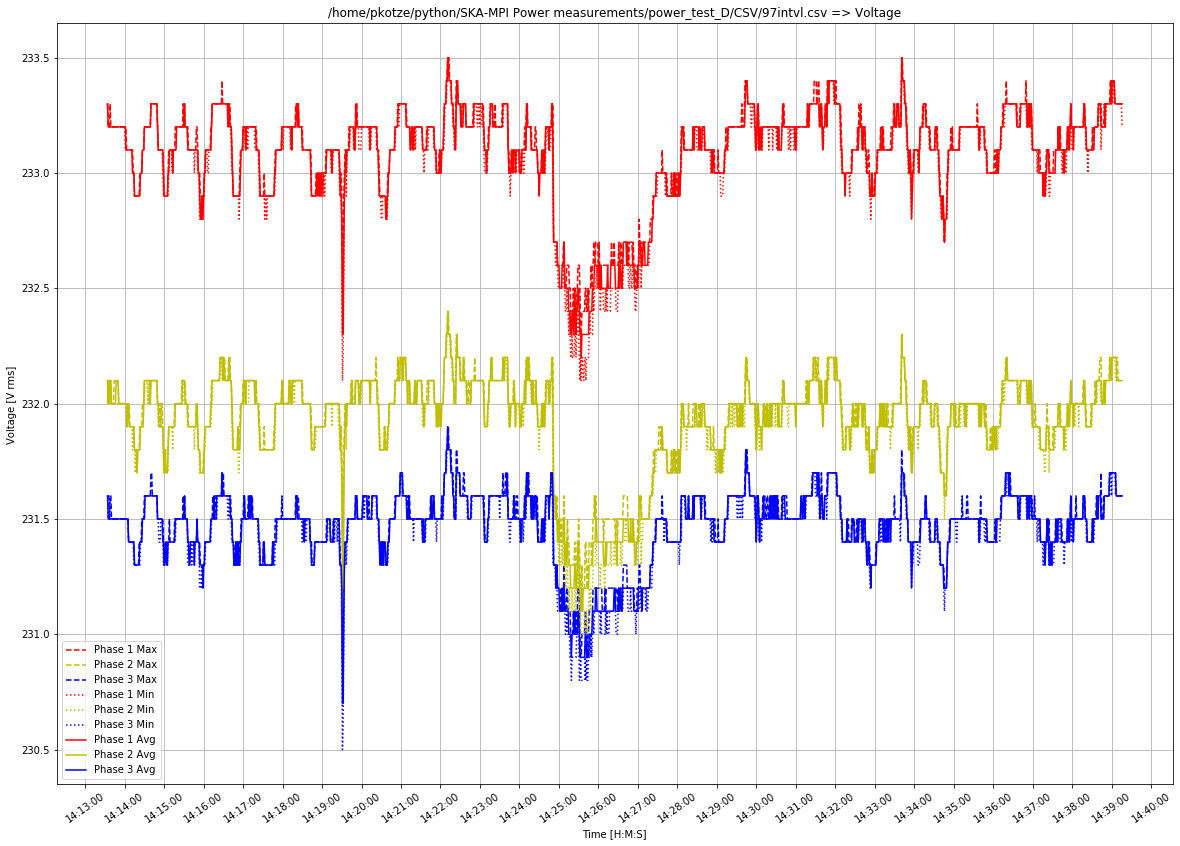

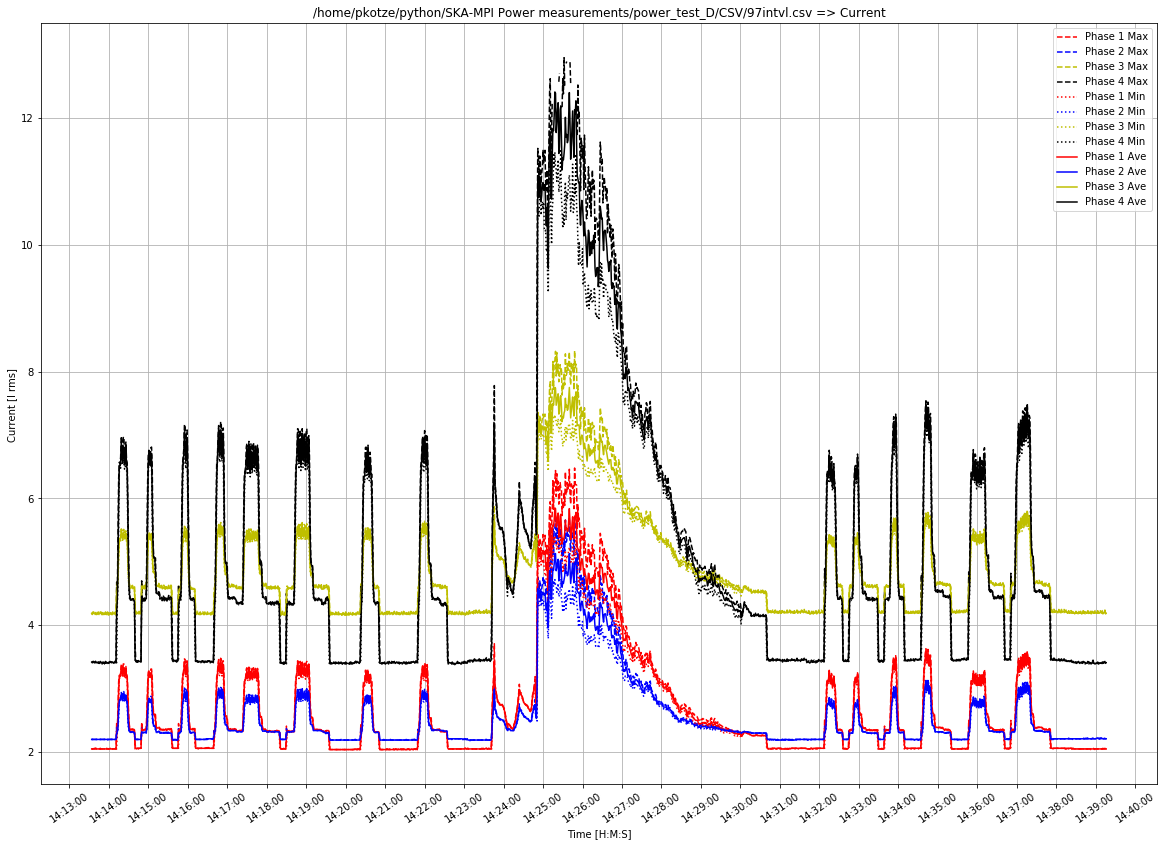

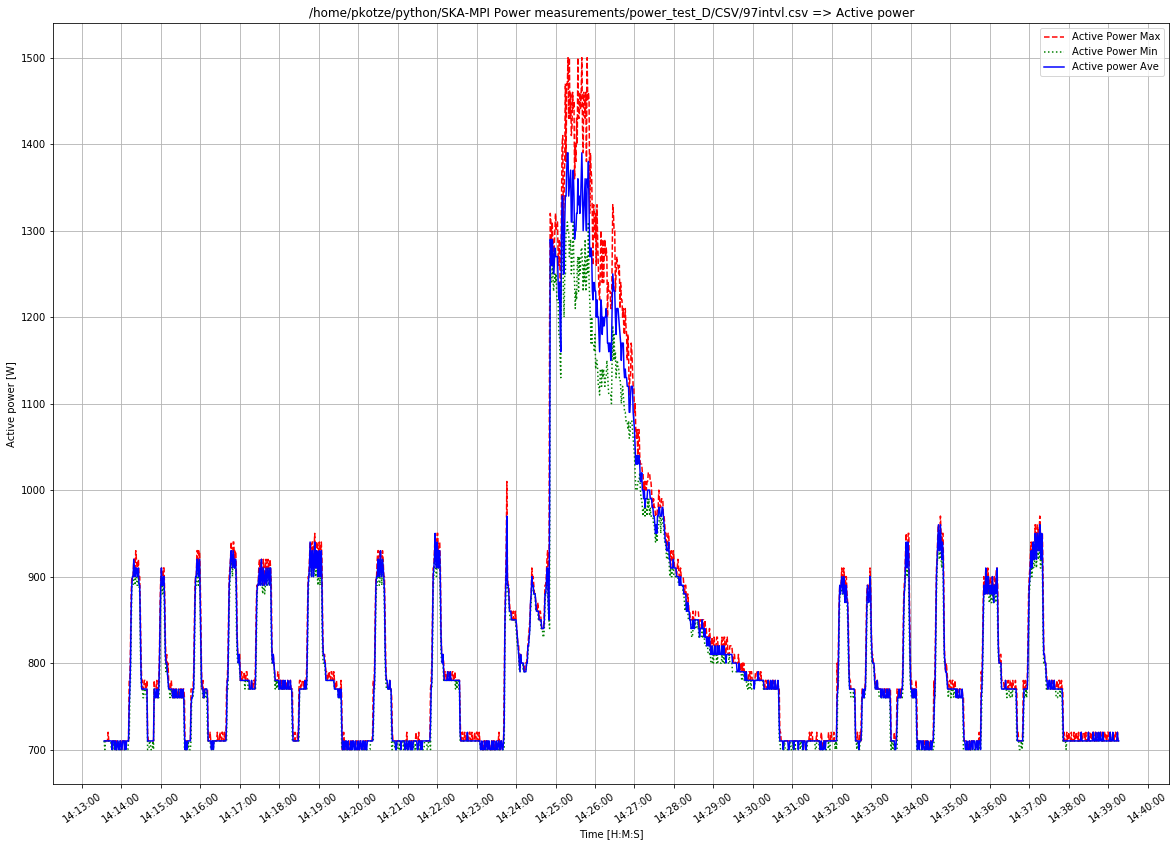

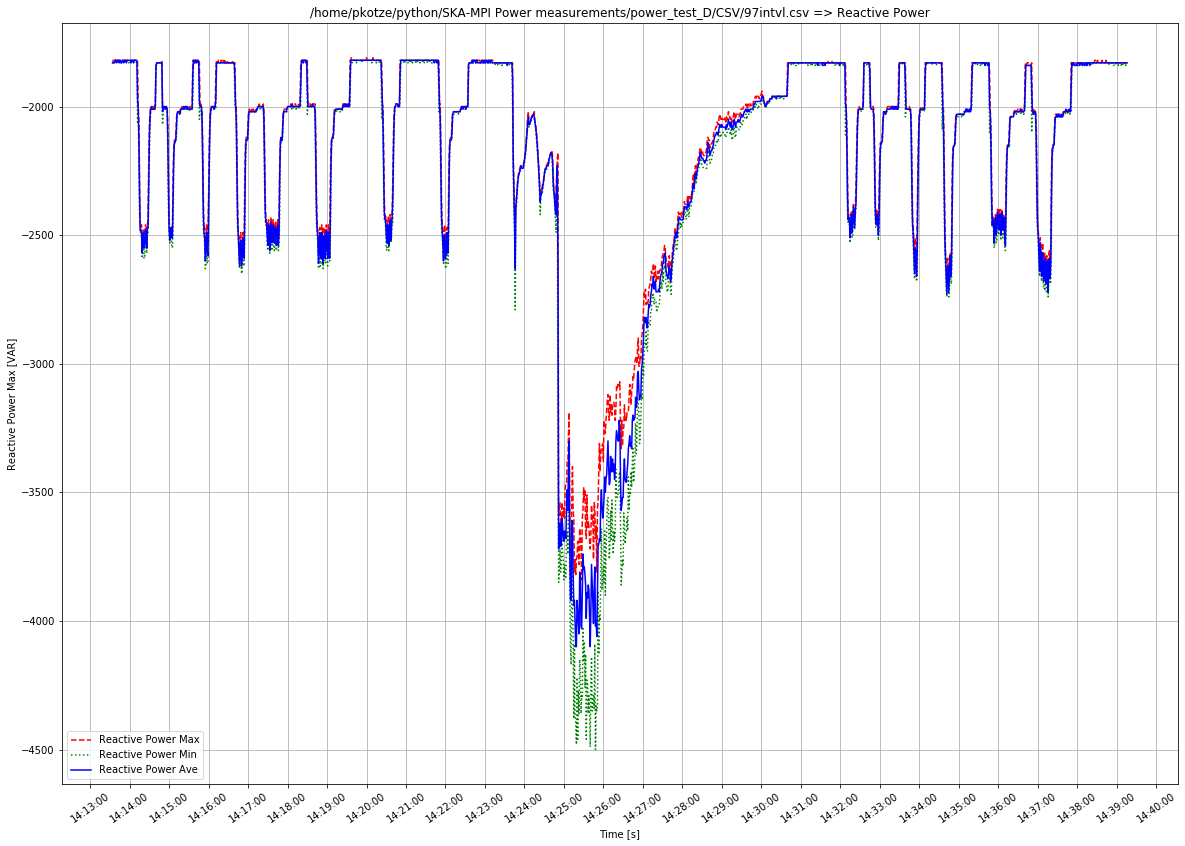

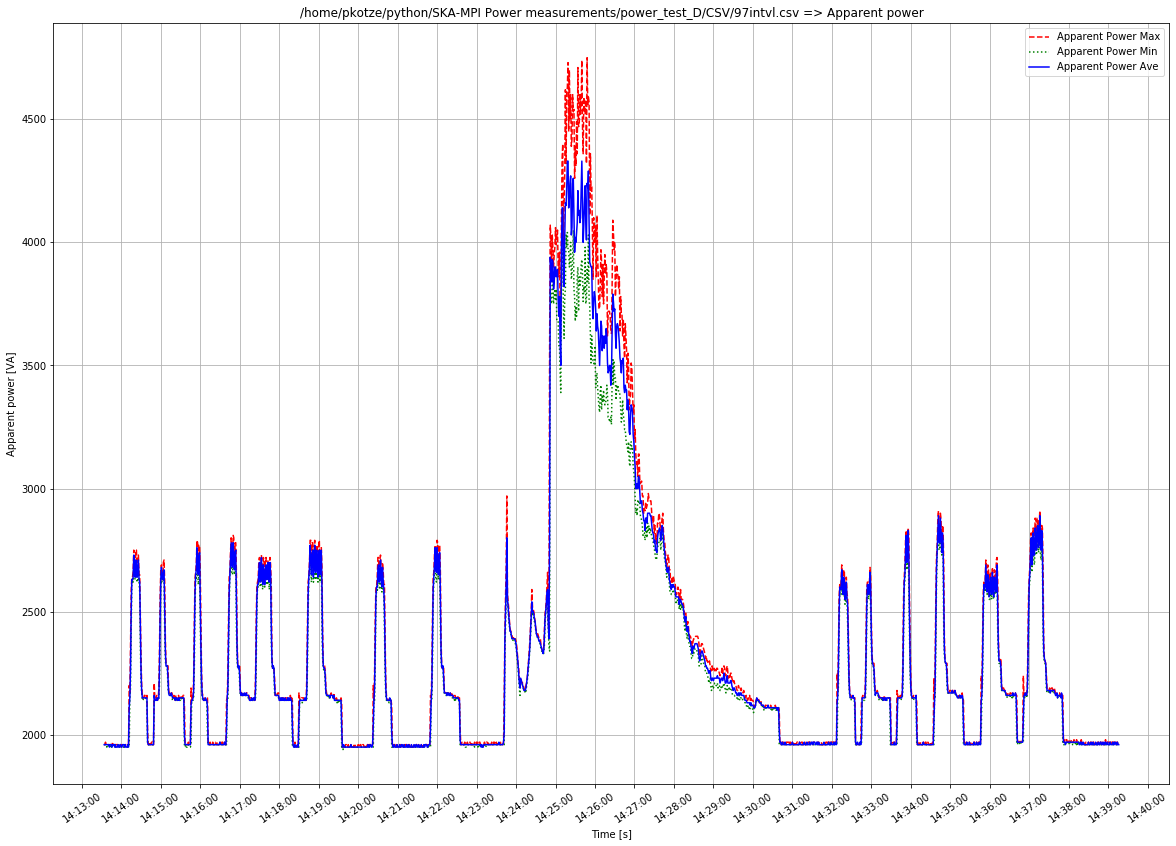

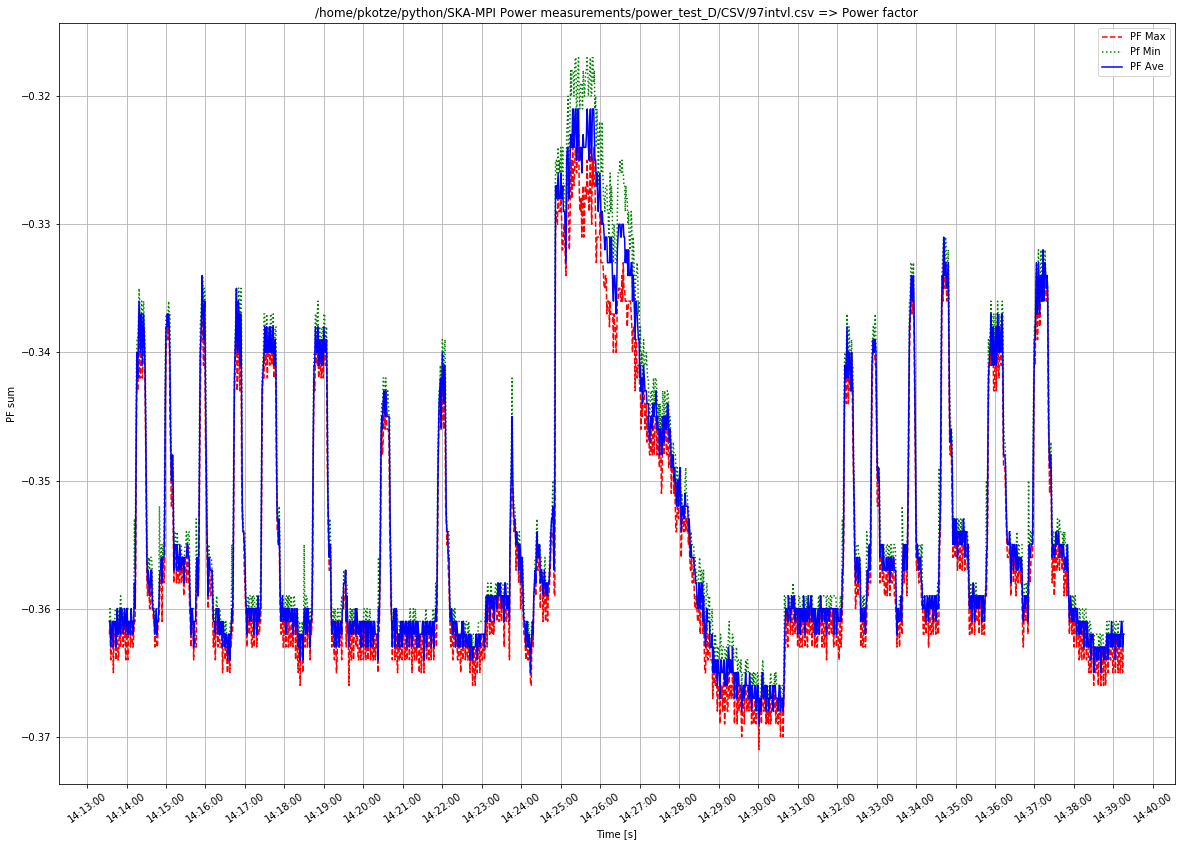

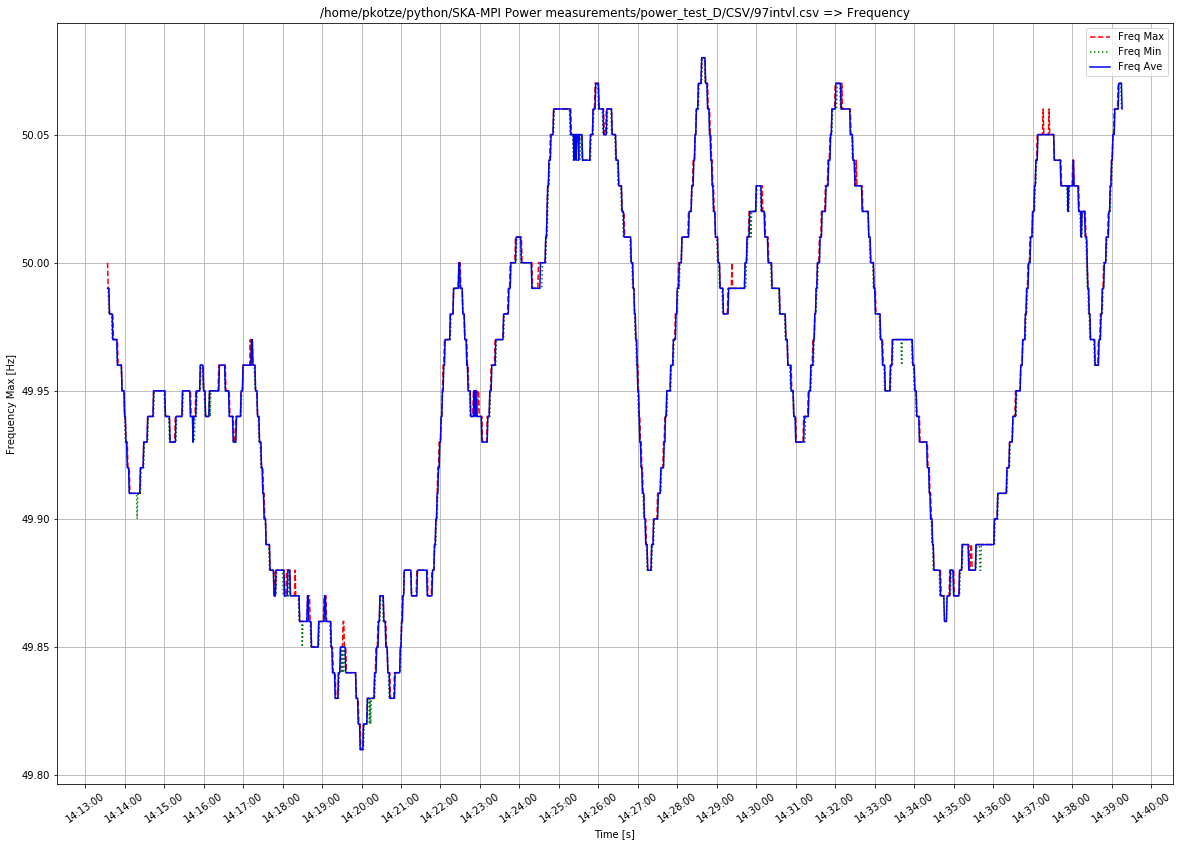

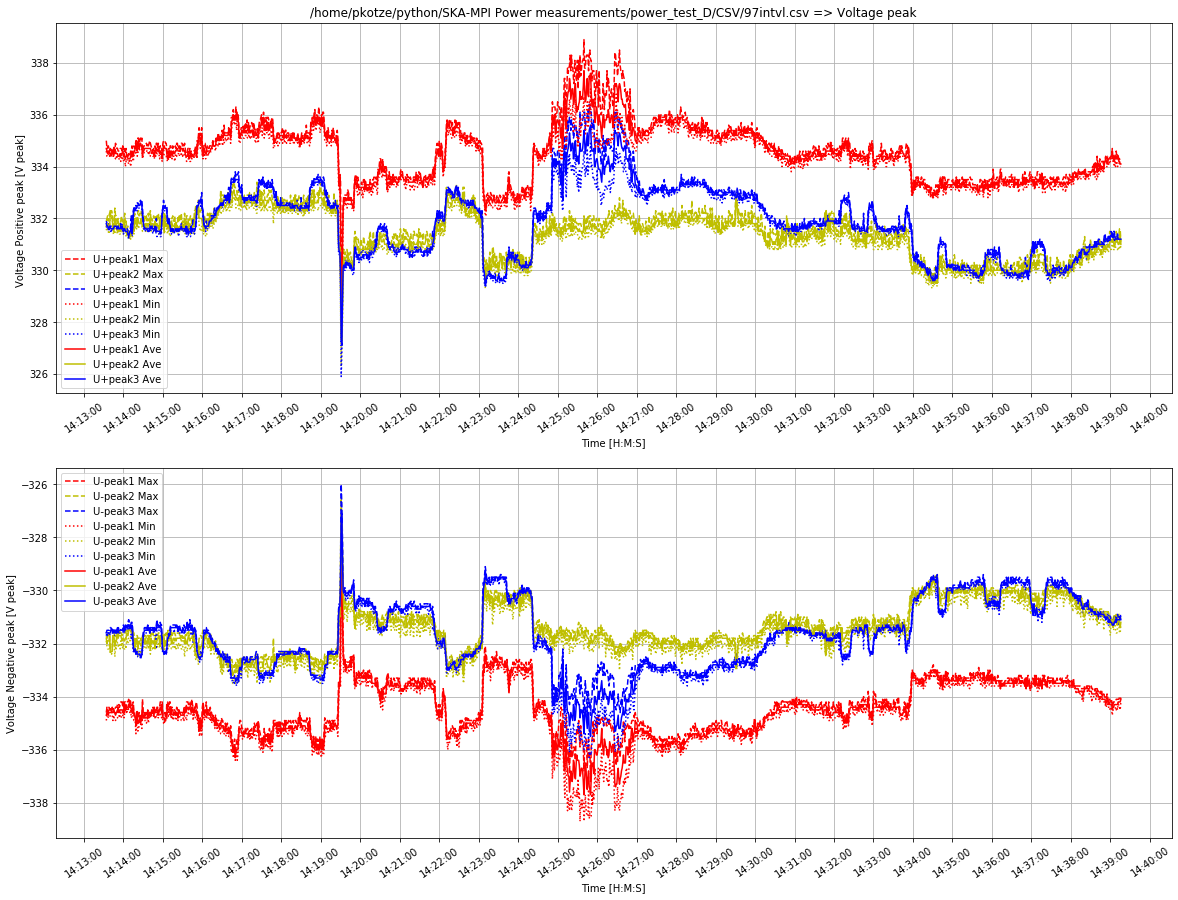

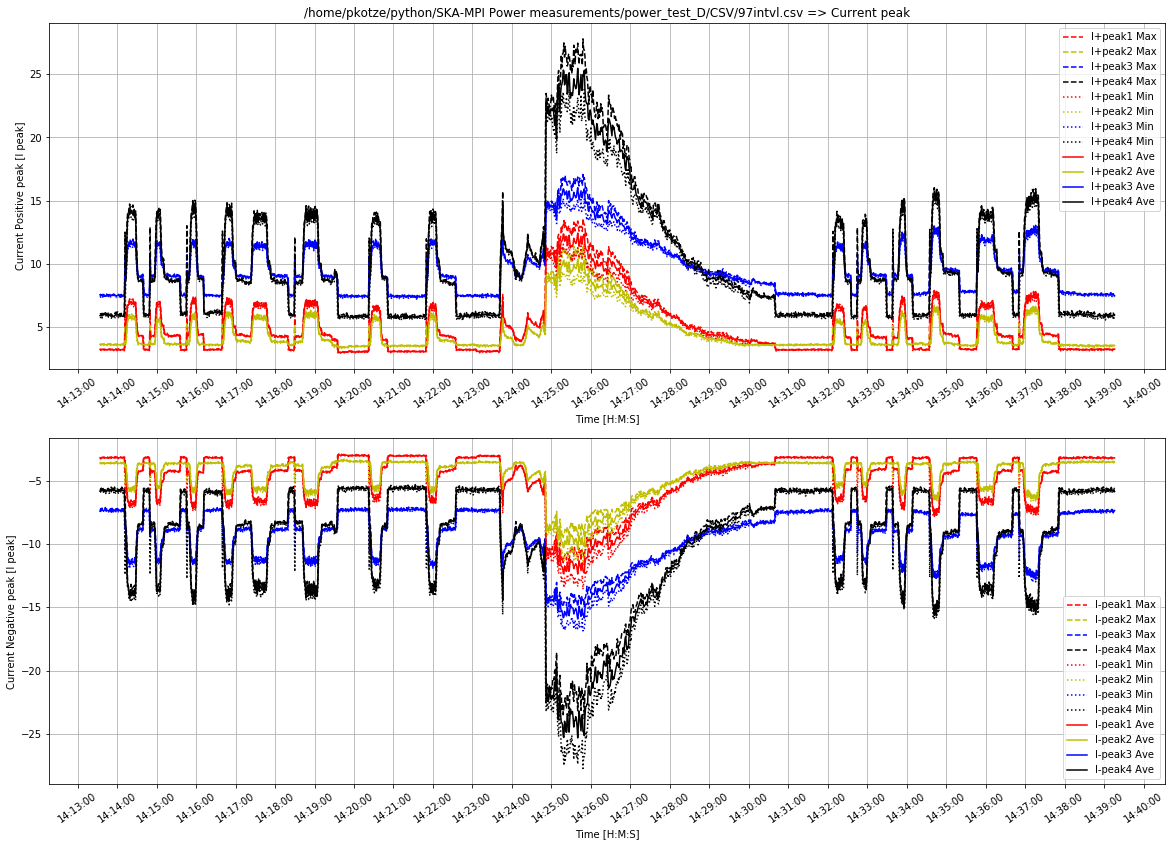

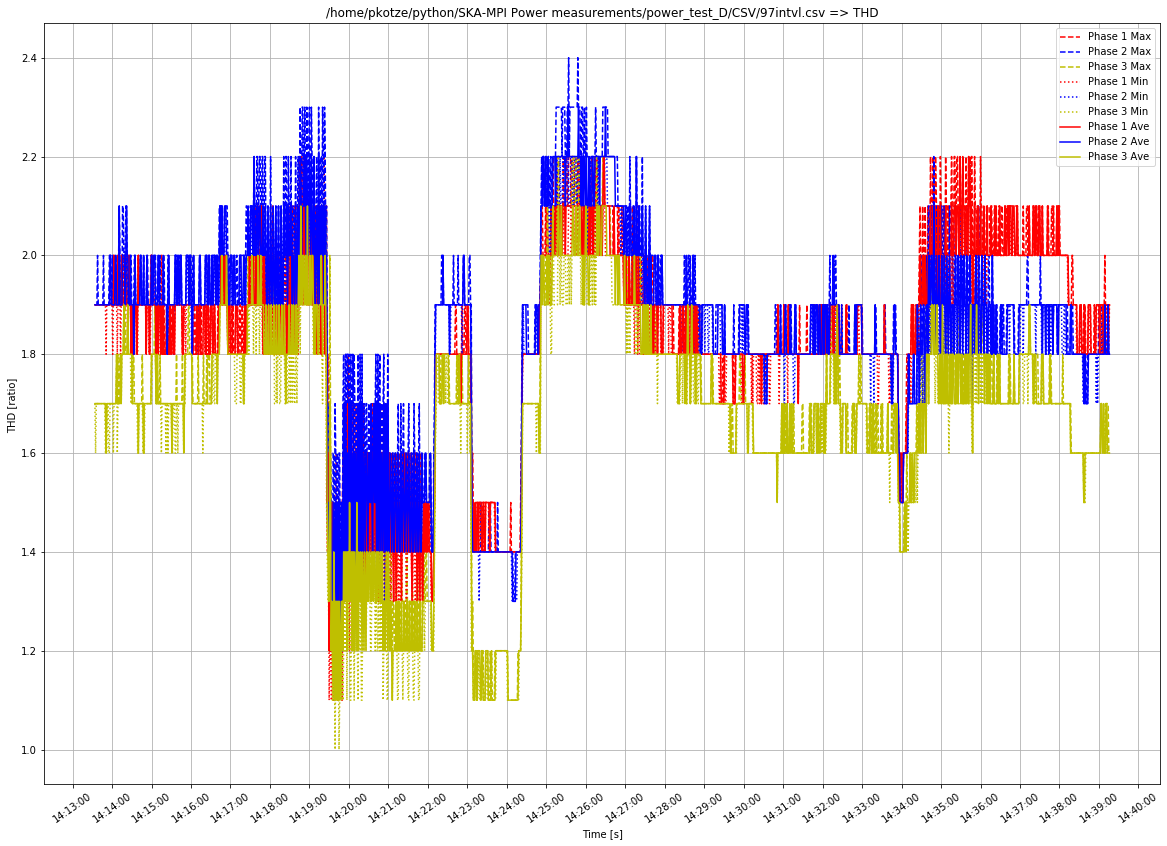

In [320]:
#Power quality analyzer

#Line to neutral voltages
v_plotter1(log_file, annotate)

#Line to line voltages 
#not on offer

#Phase currents (x4)
i_plotter1(log_file, annotate)

#Power consumption active
p_plotter1(log_file, annotate)

#Power consumption Reactive
q_plotter1(log_file, annotate)

#Complex power 
###not requested###
s_plotter1(log_file, annotate)

#Power factor
pf_plotter1(log_file, annotate)

#Frequency - max min ave on one plot more informative?
freq_plotter1(log_file, annotate)

#Peak Voltage
vp_plotter(log_file, annotate)

#Peak Current
ip_plotter(log_file, annotate)

#Voltage unbalance
#uunb_plotter1(log_file, annotate)

#Harmonic analysis?  THD
thd_plotter1(log_file)


Check timestamps step size to see if data average/interval was changed.

In [28]:
#1 - Instantaneous Inrush [VA]
#line to neutral voltage
maxurms1=np.asarray( df['MaxUrms1'] ).astype(float)
maxurms2=np.asarray( df['MaxUrms2'] ).astype(float)
maxurms3=np.asarray( df['MaxUrms3'] ).astype(float)
maxirms1=np.asarray( df['MaxIrms1'] ).astype(float)
maxirms2=np.asarray( df['MaxIrms2'] ).astype(float)
maxirms3=np.asarray( df['MaxIrms3'] ).astype(float)

maxs1=maxurms1*maxirms1
maxs2=maxurms2*maxirms2
maxs3=maxurms2*maxirms3

#Average P Q S power
maxpsum=np.asarray( df['MaxPsum'] ).astype(float) #active?
maxqsum=np.asarray( df['MaxQsum'] ).astype(float) #reactive?
maxssum=np.asarray( df['MaxSsum'] ).astype(float) #total?

#2 - Short term < 5s [W]
#3 - Long term > 5s [W]

#average PF sum
avepfsum=np.asarray( df['AvePFsum'] ).astype(float)

#frequency 
minfreq=np.asarray( df['MinFreq'] ).astype(float)
avefreq=np.asarray( df['AveFreq'] ).astype(float)
maxfreq=np.asarray( df['MaxFreq'] ).astype(float)

#average  rms line currents?
aveirms1=np.asarray( df['AveIrms1'] ).astype(float)
aveirms2=np.asarray( df['AveIrms2'] ).astype(float)
aveirms3=np.asarray( df['AveIrms3'] ).astype(float)
aveirms4=np.asarray( df['AveIrms4'] ).astype(float)

#Average P Q S power
avepsum=np.asarray( df['AvePsum'] ).astype(float) #active?
aveqsum=np.asarray( df['AveQsum'] ).astype(float) #reactive?
avessum=np.asarray( df['AveSsum'] ).astype(float) #total?


NameError: name 'timestamps' is not defined

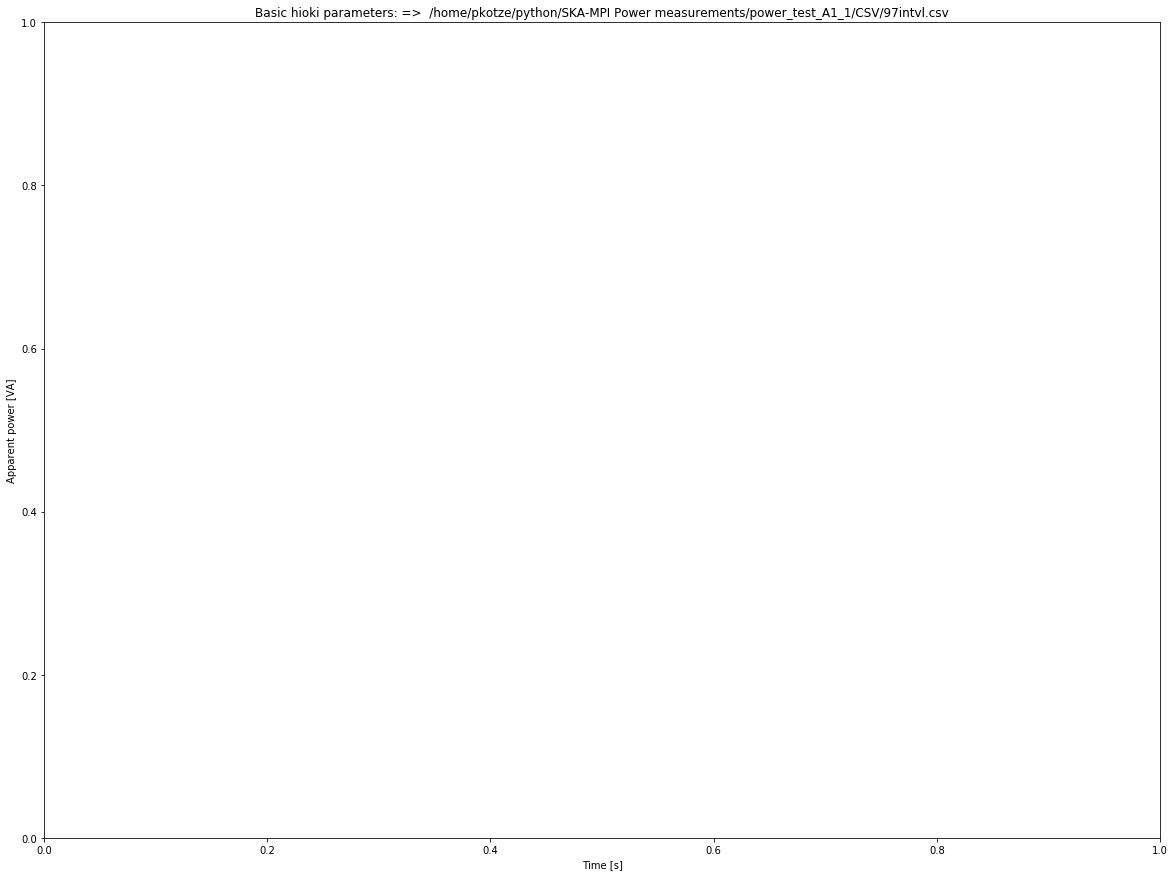

In [29]:

#Plot calculated peak 
fig,ax = plt.subplots(figsize=(20,15))

ax.set(title="Basic hioki parameters: =>  "+log_file, ylabel='Apparent power [VA]', 
xlabel='Time [s]')
ax.plot(timestamps,maxs1)
ax.plot(timestamps,maxs2)
ax.plot(timestamps,maxs3)
ax.plot(timestamps,maxpsum)
ax.plot(timestamps,maxqsum)
ax.plot(timestamps,maxssum)

ymin=-3000
ymax=3000
ystep=100
plt.yticks(range(ymin,ymax,ystep))
plt.ylim(ymin,ymax)
ax.xaxis.set_major_locator(mdates.SecondLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) 
_=plt.xticks(rotation=65)
ax.legend(['Phase 1 max S [VA]','Phase 2 max S [VA]','Phase 3 max S [VA]','p','q','s'])
ax.grid()


In [ ]:

#Plot Basic P Q S power parameters

fig,ax = plt.subplots(figsize=(20,15))

ax.set(title="Basic hioki parameters: =>  "+log_file, ylabel='AvePMaxSsum [W?]', 
xlabel='Time [s]')
ax.plot(timestamps,avepsum)
ax.plot(timestamps,aveqsum)
ax.plot(timestamps,avessum)


ymin=-3000
ymax=3000
ystep=100
plt.yticks(range(ymin,ymax,ystep))
plt.ylim(ymin,ymax)
ax.xaxis.set_major_locator(mdates.SecondLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) 
_=plt.xticks(rotation=65)
ax.legend(['P [W]','Q [VAR]','S [VA]'])
ax.grid()


In [ ]:
#line to neutral voltage
aveirms1=np.asarray( df['AveUrms1'] ).astype(float)
aveirms2=np.asarray( df['AveUrms2'] ).astype(float)
aveirms3=np.asarray( df['AveUrms3'] ).astype(float)

#average PF sum
avepfsum=np.asarray( df['AvePFsum'] ).astype(float)

#frequency 
minfreq=np.asarray( df['MinFreq'] ).astype(float)
avefreq=np.asarray( df['AveFreq'] ).astype(float)
maxfreq=np.asarray( df['MaxFreq'] ).astype(float)

#average  rms line currents?
aveirms1=np.asarray( df['AveIrms1'] ).astype(float)
aveirms2=np.asarray( df['AveIrms2'] ).astype(float)
aveirms3=np.asarray( df['AveIrms3'] ).astype(float)
aveirms4=np.asarray( df['AveIrms4'] ).astype(float)

#Average P Q S power
avepsum=np.asarray( df['AvePsum'] ).astype(float) #active?
aveqsum=np.asarray( df['AveQsum'] ).astype(float) #reactive?
avessum=np.asarray( df['AveSsum'] ).astype(float) #total?


In [ ]:


fig,ax = plt.subplots(figsize=(20,15))

ax.set(title="Basic hioki parameters: =>  "+log_file, ylabel='AvePMaxSsum [W?]', 
xlabel='Time [s]')
ax.plot(timestamps,avepsum)
ax.plot(timestamps,aveqsum)
ax.plot(timestamps,avessum)


ymin=0
ymax=3000
ystep=100
#plt.yticks(range(ymin,ymax,ystep))
#plt.ylim(ymin,ymax)
ax.xaxis.set_major_locator(mdates.SecondLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) 
_=plt.xticks(rotation=65)
ax.legend(['P','Q','S'])
ax.grid()


In [ ]:
#Plot Basic engine parameters

fig,ax = plt.subplots(figsize=(20,20))

ax.set(title="Basic hioki parameters: =>  "+log_file, ylabel='Ave I RMS', 
xlabel='Time [s]')
ax.plot(timestamps,aveirms1)
ax.plot(timestamps,aveirms2)
ax.plot(timestamps,aveirms3)
ax.plot(timestamps,aveirms4)

ax.xaxis.set_major_locator(mdates.SecondLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) 
_=plt.xticks(rotation=90)
ax.legend(['1','2','3','4'])
ax.grid()


In [ ]:

fig,ax = plt.subplots(figsize=(20,20))

ax.set(title="Basic hioki parameters: =>  "+log_file, ylabel='Ave I RMS', 
xlabel='Time [s]')
ax.plot(timestamps,avepfsum)

ax.xaxis.set_major_locator(mdates.SecondLocator(interval=30))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) 

ax.legend(['1','2','3','4'])
ax.grid()

In [ ]:

fig,ax = plt.subplots(figsize=(20,20))

ax.set(title="Basic hioki parameters: =>  "+log_file, ylabel='AvePMaxSsum [W?]', 
xlabel='Time [s]')
ax.plot(timestamps,minfreq)
ax.plot(timestamps,avefreq)
ax.plot(timestamps,maxfreq)


ymin=0
ymax=3000
ystep=100
#plt.yticks(range(ymin,ymax,ystep))
#plt.ylim(ymin,ymax)
ax.xaxis.set_major_locator(mdates.SecondLocator(interval=30))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) 
ax.legend(['Min','aVe','Max'])
ax.grid()
